## Analisis de Precios Aguacate

Analizar el conjunto de datos de comercio electrónico de ropa femenina que contiene reseñas escritas por los clientes.

Propósito:
    
    

In [1]:
# Inspirado en: https://medium.com/analytics-vidhya/a-complete-analysis-of-avocado-data-data-science-92d792ac7e98
# Fuente datos: https://www.kaggle.com/neuromusic/avocado-prices from http://www.hassavocadoboard.com/retail/volume-and-price-data

In [2]:
# Importar librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In c:\users\monrroyy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\monrroyy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\monrroyy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
# Carga de datos
df = pd.read_csv('C:/Users/monrroyy/Documents/UPSA_BigData_2/avocado-updated-2020.csv')


In [6]:
# mostrar datos
df.head()
#df.columns
#df.shape

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [6]:
# descripción de datos (mean, std, max, min, count ...)
df.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,30021.000000,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,30021.000000
mean,1.390930,9.392546e+05,2.991073e+05,2.849014e+05,2.162937e+04,3.335336e+05,2.321256e+05,9.518529e+04,6.222717e+03,2017.205123
std,0.381347,3.813519e+06,1.289108e+06,1.169078e+06,1.009188e+05,1.415618e+06,9.505028e+05,4.672104e+05,3.813737e+04,1.570133
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.110000,1.429853e+04,7.827800e+02,2.814000e+03,0.000000e+00,8.373820e+03,5.955980e+03,3.515900e+02,0.000000e+00,2016.000000
50%,1.350000,1.242047e+05,1.052276e+04,2.456722e+04,1.867500e+02,5.039131e+04,3.425532e+04,5.171120e+03,0.000000e+00,2017.000000
75%,1.630000,4.898029e+05,1.151556e+05,1.409472e+05,5.424160e+03,1.591742e+05,1.129384e+05,3.606762e+04,5.600000e+02,2019.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.022564e+06,2020.000000


In [8]:
# eliminar columna indice
#df = df.drop('Unnamed: 0', axis = 1)

In [9]:
# verificamos la existencia de datos nulos
df.isna().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

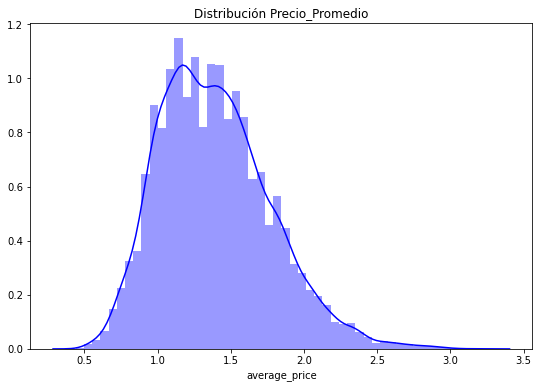

In [10]:
# visualizacion de datos
# buscaremos relaciones entre precios y otras variables
plt.figure( figsize = (9,6))
plt.title('Distribución Precio_Promedio')
sns.distplot(df['average_price'], color = 'b')

Conclusiones: Al ver la campana de distribucion vemos: 
- el precio promedio oscila entre xx - xx (vertical)
- los valores superior de la distribución estan en max de xx.
- la mayoría de los datos se concentran entre xx y xx (horizontal)

cantidades vendidas de cada tipo aguacate es   conventional    15012
organic         15009
Name: type, dtype: int64


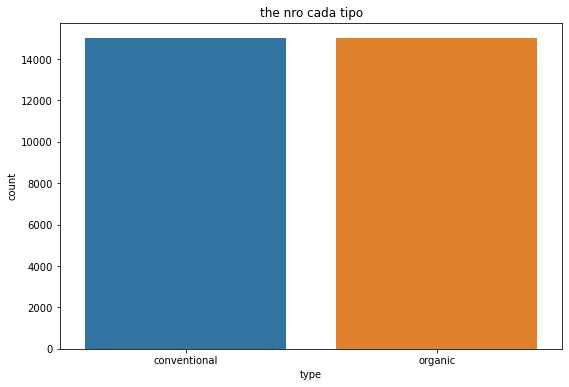

In [11]:
# visualizar los dos tipos de aguacate
print('cantidades vendidas de cada tipo aguacate es  ', df['type'].value_counts())
plt.figure(figsize = (9,6))
plt.title('the nro cada tipo')
sns.countplot('type', data = df)

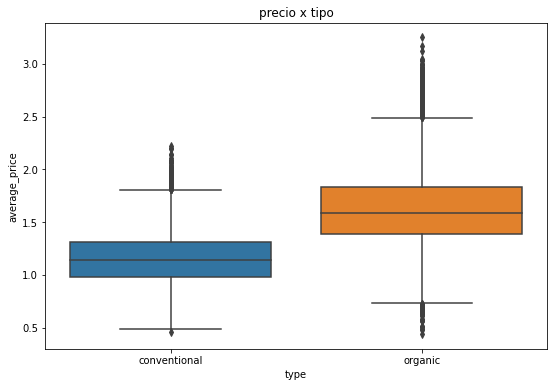

In [12]:
# comparamos los precios x tipo
plt.figure(figsize = (9,6))
plt.title('precio x tipo')
sns.boxplot(x = 'type', y = 'average_price', data =df)

Comentarios de la grafica anterior: 
el precio promedio del aguacate organico es superior al convencional

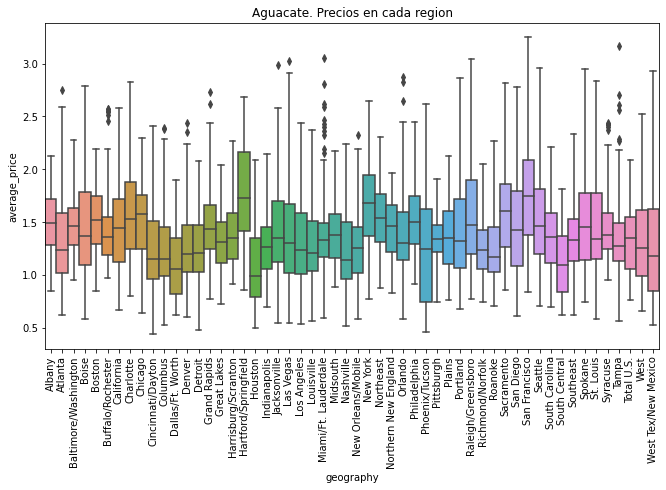

In [13]:
# comparación de precios promedios por región
plt.figure(figsize = (11,6))
plt.title('Aguacate. Precios en cada region')
plt.xticks(rotation = 'vertical')  ### ojo.. investigar sobre esta opcion
sns.boxplot(x = 'geography', y = 'average_price', data =df, width =1, whis = 2)

Conclusiones sobre la gráfica: 
en cuanto a los precios relativos x region, encontramos que
- Springfield es la zona mas cara para vender aguacates en general
- Houston es la zona más barata para vender.

c:\users\monrroyy\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\monrroyy\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


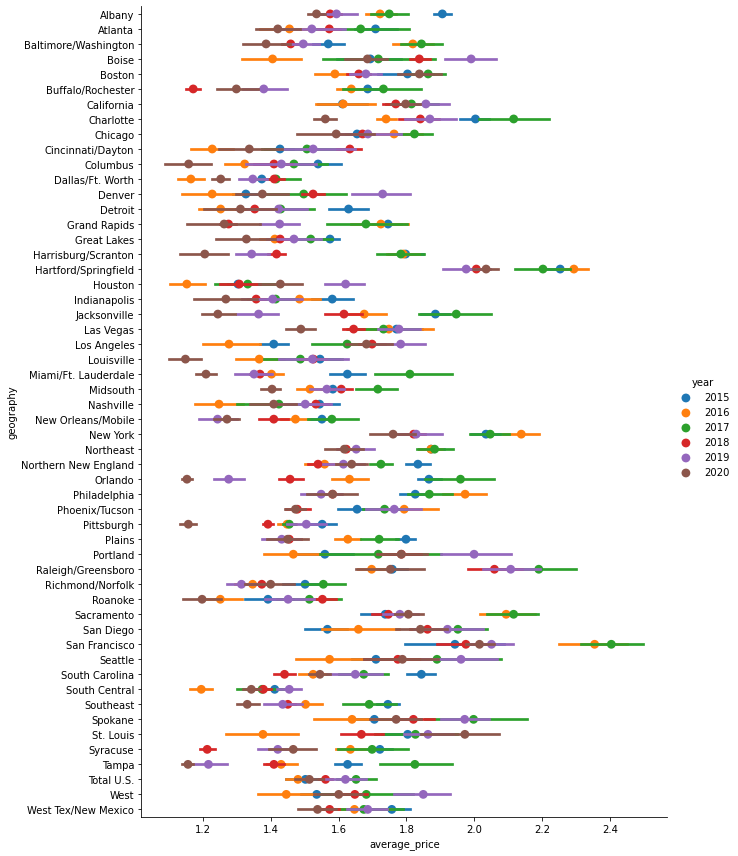

In [14]:
# Aplicando filtros para otras visualizaciones por tipo/precios x region/ año
organic = df[df['type'] == 'organic']
sns.factorplot( x = 'average_price', y ='geography', hue = 'year', data = organic, size=12, aspect=0.8, join=False)


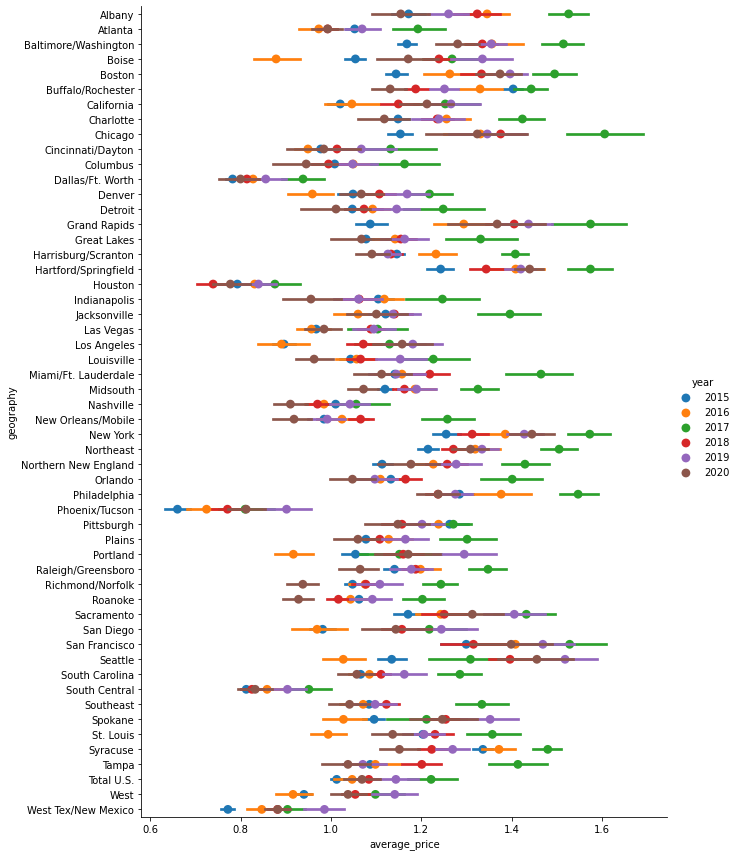

In [15]:
# comparamos el tipo de avocado convencional
conventional = df[df['type'] == 'conventional']
sns.factorplot( x = 'average_price', y =  'geography', hue = 'year', data = conventional, size=12, aspect=0.8, join=False)


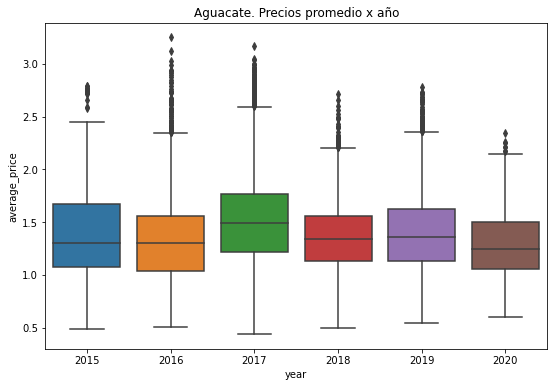

In [16]:
# veamos los preciospromedio x año
plt.figure(figsize = (9,6))
plt.title('Aguacate. Precios promedio x año')
sns.boxplot(x = 'year', y = 'average_price', data = df)


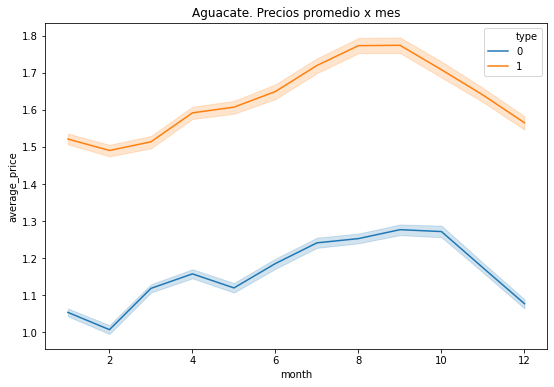

In [33]:
# encontremos la relación entre precio y meses, ya que tenemos fechas
df['date'] = pd.to_datetime(df['date'])
df['month']= df['date'].map(lambda x: x.month)

plt.figure(figsize = (9,6))
plt.title('Aguacate. Precios promedio x mes')
sns.lineplot(x = 'month', y = 'average_price', data = df, hue = 'type' )


In [34]:
# en el grafico anterior vemos aumentos en unos meses y disminución en otros
# grafiquemos x estacion
seasons = { 1: 'winter', 4: 'autumn', 3: 'summer', 2: 'spring' }
df['seasons'] = [(month%12 + 3)//3 for month in df['months']]
df. seasons = [seasons[i]  for i in df.seasons]


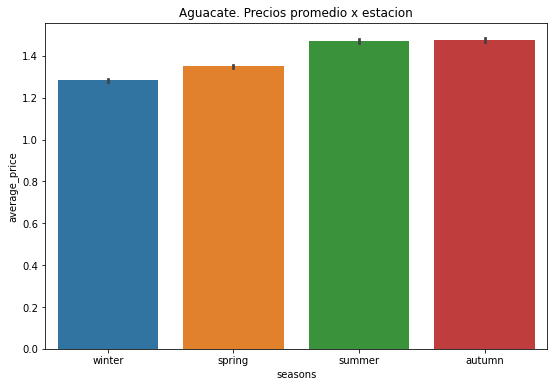

In [35]:
plt.figure(figsize = (9,6))
plt.title('Aguacate. Precios promedio x estacion')
sns.barplot(x = 'seasons', y = 'average_price', data = df)

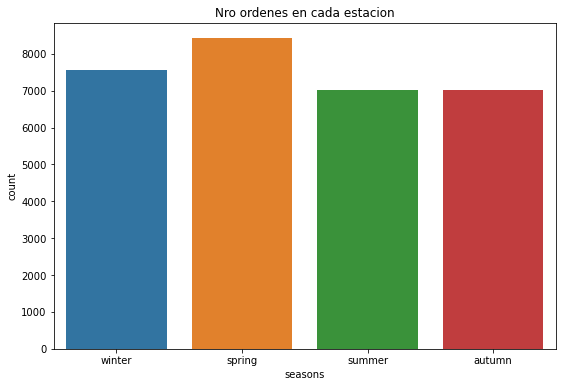

In [36]:
plt.figure(figsize = (9,6))
plt.title('Nro ordenes en cada estacion')
sns.countplot(x = 'seasons',  data = df)

In [37]:
# Correlaciones ** mapa calor ** 
from sklearn.preprocessing import LabelEncoder
objectt = LabelEncoder()

In [38]:
di = {}
objectt.fit(df.type.drop_duplicates())
di['type'] = list(objectt.classes_)
df.type = objectt.transform(df.type)

In [39]:
di2 = {}
objectt2 = LabelEncoder()
objectt2.fit(df.seasons.drop_duplicates())
di2['seasons'] = list(objectt2.classes_)
df.seasons = objectt2.transform(df.seasons)


In [5]:
import numpy as np
cols = [ 'average_price', 'type', 'year', 'total_volume', 'total_bags', 'seasons']
cm = np.corrcoef(df[cols].values.T)
ax = sns.heatmap(data, xticklabels=2, yticklabels=False)
#https://stackoverflow.com/questions/20335290/matplotlib-plot-set-x-ticks
#sns.heatmap(cm, cbar = True, fmt = '.2f', annot = True, square = True, yticklabels = cols, xticklables = 2)


NameError: name 'df' is not defined